In [1]:
from gensim.models import Word2Vec

In [2]:
import pandas as pd
import csv

In [3]:
glencore = pd.read_csv('glencorePR.csv', delimiter = ',')

In [4]:
glencore = glencore.drop(['_source.title', '_score', '_source.doctype', '_type', '_index', '_source.url', '_source.feedurl'], axis = 1)
glencore = glencore.rename(index=str, columns={"_source.title_rss": "title", "_source.teaser_rss": "content"})

In [5]:
contents = []
contents = glencore.content.astype(str)

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xijiahu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/xijiahu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(contents):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', contents)
    stop_free = " ".join([str(i) for i in cleantext.lower().split() if i not in stop])
    stop_free.replace('nan',' ')
#remove "nan" from text
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in contents]

In [8]:
model = Word2Vec(doc_clean, min_count=1)

In [9]:
print(model)

Word2Vec(vocab=3018, size=100, alpha=0.025)


In [10]:
words = list(model.wv.vocab)

In [11]:
print(words)

['glencore', 'plc', 'today', 'announced', 'board', 'recommending', 'aggregate', 'distribution', 'us020', 'per', 'share', 'respect', '2017', 'financial', 'year', 'ended', '31', 'december', 'declared', 'paid', 'u', 'dollar', 'although', 'shareholder', 'jersey', 'register', 'able', 'elect', 'receive', 'payment', 'pound', 'sterling', 'euro', 'swiss', 'franc', 'hold', 'computershare', 'hk', 'nominee', 'hong', 'kong', 'converted', 'applicable', 'exchange', 'rate', 'reference', 'date', 'johannesburg', 'south', 'african', 'rand', 'subject', 'approval', 'made', 'capital', 'contribution', 'reserve', 'company', 'two', 'equal', 'tranche', '010', 'payable', 'first', 'six', 'month', '2018', 'h1', 'second', 'h2', 'accordance', 'following', 'timetable', 'event', 'all', 'stock', 'jse', 'close', 'business', 'uk', 'thursday', '12', 'april', 'friday', '13', 'last', 'day', 'effect', 'removal', 'cum', 'commencement', 'trade', 'time', 'recorded', 'record', 'sa', 'monday', '23', 'exdistribution', 'tuesday', '

In [12]:
print(model['glencore'])

[ 0.67122227  0.08730824 -0.24525528  0.89729637 -0.44441202  0.3868366
 -0.05168706  0.35010335  0.60883325 -0.21274506 -0.45154345 -1.0008198
 -0.51329905 -0.5138448  -0.9335377  -0.15697803 -0.01078817  0.02074888
  0.7612244   0.47508705  0.12693983 -0.6417979   0.6273954  -0.12842
 -0.22709213 -0.13281663  0.42342058  0.00593032  1.043869   -0.5030904
 -0.16682541 -0.10265593  1.0385766   0.6550504  -0.19690885  0.11178295
 -0.385844    0.44700438  0.29446954  1.0829343  -0.9215555  -0.41653594
  0.8331038   0.29588062  0.46654055 -0.5447114   0.28495938 -0.3043792
  1.3633411  -0.7601416   0.14800577 -0.12359749  0.3632793  -1.3513858
  0.5338179  -0.54817295  0.6045683  -1.0698446   0.17148505  0.7055834
  0.03971529  0.13549992 -0.48576286 -0.19463728  0.09667709  0.40895626
 -0.34088105  0.01802609  1.063972   -0.08632474  0.20596302 -0.23138264
  0.5363399  -0.15123622  0.581073   -0.32361895 -0.14439422  0.4993735
  0.12050486  0.3775008   0.33801648 -0.4499066   0.3686954  

/Users/xijiahu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [13]:
model.save('model.bin')

In [14]:
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=3018, size=100, alpha=0.025)


In [15]:
import numpy as np
from sklearn.decomposition import PCA

In [16]:
import matplotlib.pyplot as pyplot
import pylab

In [17]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/Users/xijiahu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


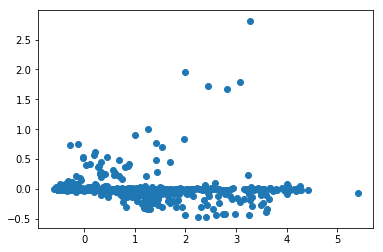

In [18]:
pyplot.scatter(result[:, 0], result[:, 1])

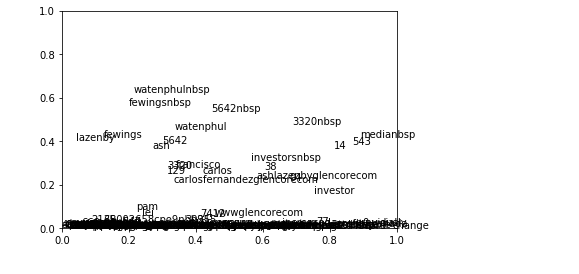

In [19]:
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

In [20]:
pyplot.show()